In [2]:
import pandas as pd
import sys
import geopandas as gpd

import matplotlib.pyplot as plt
from event_prediction_data_ import *

from event_prediction_utils import data_path

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter



c:\Users\huigyu\anaconda3\envs\BSS\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
data = pd.read_csv('C:/Users/huigyu/workspace/BikeSharingSystems_rnd/03.Data/use_historical/20191210.csv',
                   names = ['ID', 'Timestamp', 'Station_name', 'Address', 'Total_docks', 'Docks_in_service', 'Available_docks', 'Available_bikes', 'Percent_full', 'Status', 'Latitude', 'Longitude', 'Location', 'Record'])

(-87.9609129407717, -87.50333825489854, 41.62561835013416, 42.04196335988169)

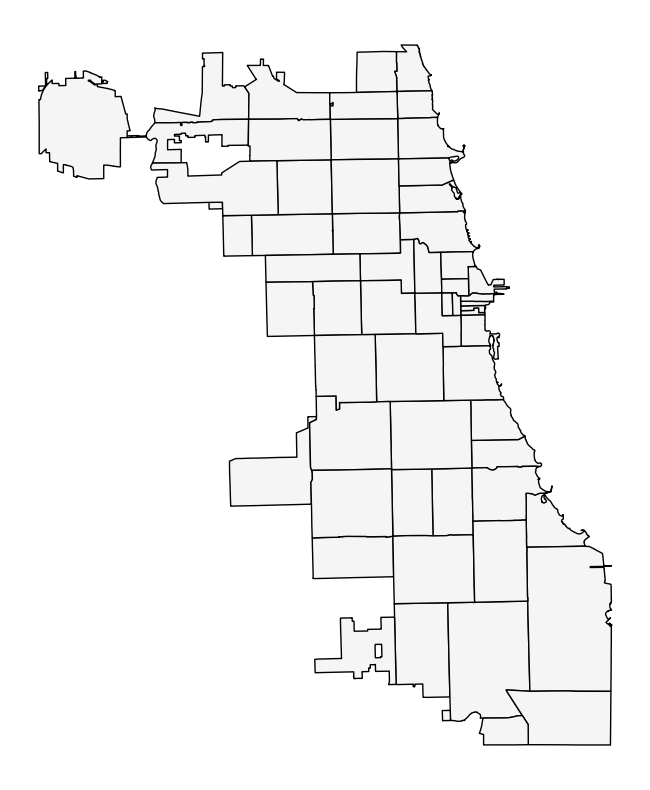

In [4]:
gdf = gpd.read_file('C:/Users/huigyu/workspace/BikeSharingSystems_rnd/02.Code/Practice_code/geo_export_dd9da705-66ae-428c-9857-158c713facfe.shp')

ax = gdf.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')

In [5]:
file_cnt = 10

boundary = [0.00,0.20,0.40,0.60,0.80,sys.maxsize/100]
dir_path_ = "."+data_path+"use_historical/*.csv"

(data_dict, station_list, station_total_dock, location, max_val) = historical_station_logs(file_cnt, dir_path_)


<_io.TextIOWrapper name='../03.Data/xx.chicago_bike_dataset/use_historical\\20191210.csv' mode='r' encoding='utf-8'>
<_io.TextIOWrapper name='../03.Data/xx.chicago_bike_dataset/use_historical\\20191211.csv' mode='r' encoding='utf-8'>
<_io.TextIOWrapper name='../03.Data/xx.chicago_bike_dataset/use_historical\\20191212.csv' mode='r' encoding='utf-8'>
<_io.TextIOWrapper name='../03.Data/xx.chicago_bike_dataset/use_historical\\20191213.csv' mode='r' encoding='utf-8'>
<_io.TextIOWrapper name='../03.Data/xx.chicago_bike_dataset/use_historical\\20191214.csv' mode='r' encoding='utf-8'>
<_io.TextIOWrapper name='../03.Data/xx.chicago_bike_dataset/use_historical\\20191215.csv' mode='r' encoding='utf-8'>
<_io.TextIOWrapper name='../03.Data/xx.chicago_bike_dataset/use_historical\\20191216.csv' mode='r' encoding='utf-8'>
<_io.TextIOWrapper name='../03.Data/xx.chicago_bike_dataset/use_historical\\20191217.csv' mode='r' encoding='utf-8'>
<_io.TextIOWrapper name='../03.Data/xx.chicago_bike_dataset/use_

In [7]:
location_df = pd.DataFrame(location).T.reset_index()
location_df.columns = ['STATION','LATITUDE', 'LONGITUDE']

location_df

,STATION,LATITUDE,LONGITUDE
0,larrabeest&kingsburyst,41.897764,-87.642884
1,orleansst&merchandisemartplaza,41.888243,-87.636390
2,63rdstbeach,41.781016,-87.576120
3,stonyislandave&67thst,41.773458,-87.585340
4,clintonst&polkst,41.871467,-87.640949
...,...,...,...
606,fieldmuseum,41.865312,-87.617867
607,lasallest&washingtonst,41.882664,-87.632530
608,lakeshoredr&ohiost,41.892570,-87.614492
609,millenniumpark,41.881032,-87.624084


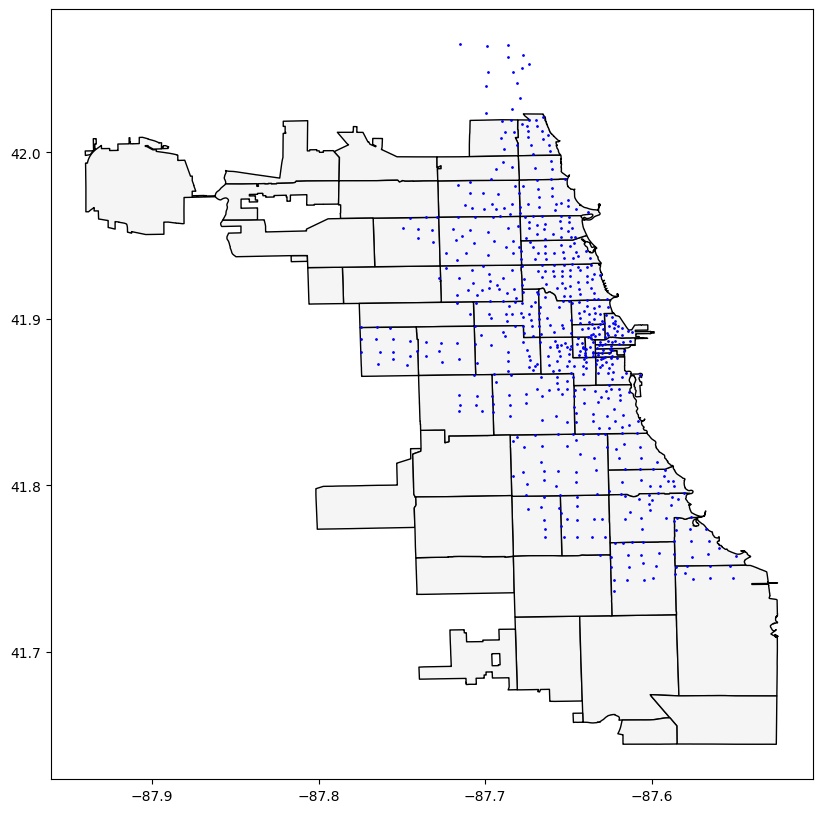

In [7]:
gdf1 = gpd.GeoDataFrame(location_df, geometry=gpd.points_from_xy(location_df['LONGITUDE'], location_df['LATITUDE']))

ax = gdf.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
gdf1.plot(ax=ax, color='blue', markersize=1)

#ax.axis('off')

plt.show()

In [9]:
'''geolocator = Nominatim(user_agent="BSS")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

def get_zipcode(lat, lon):
    try:
        location = reverse((lat, lon), language='en')
        return location.raw['address']['postcode']
    except:
        return None

location_df['ZIP_Code'] = location_df.apply(lambda row: get_zipcode(row['LATITUDE'], row['LONGITUDE']), axis=1)

location_df.to_csv('loc_zip.csv', index=False)'''

In [15]:
location_df = pd.read_csv('C:/Users/huigyu/workspace/BikeSharingSystems_rnd/02.Code/loc_zip_.csv', dtype={'ZIP_Code': str})

In [4]:
'''null_mask = location_df.isnull().any(axis=1)
null_rows = location_df[null_mask]

print(null_rows)

# 60604
# 60616
# 60619
# 60602
location_df.loc[292, 'ZIP_Code'] = '60604'
location_df.loc[312, 'ZIP_Code'] = '60616'
location_df.loc[494, 'ZIP_Code'] = '60619'
location_df.loc[596, 'ZIP_Code'] = '60602'
'''

Empty DataFrame
Columns: [STATION, LATITUDE, LONGITUDE, ZIP_Code]
Index: []


In [14]:
location_df

,STATION,LATITUDE,LONGITUDE,ZIP_Code,max_available_bikes
0,larrabeest&kingsburyst,41.897764,-87.642884,60610,42
1,orleansst&merchandisemartplaza,41.888243,-87.636390,60654,34
2,63rdstbeach,41.781016,-87.576120,60649,8
3,stonyislandave&67thst,41.773458,-87.585340,60619,7
4,clintonst&polkst,41.871467,-87.640949,60607,14
...,...,...,...,...,...
606,fieldmuseum,41.865312,-87.617867,60605,22
607,lasallest&washingtonst,41.882664,-87.632530,60696,15
608,lakeshoredr&ohiost,41.892570,-87.614492,60611,18
609,millenniumpark,41.881032,-87.624084,60602,37


In [18]:
### AVERAGE ###

# zip_code별 station 개수
station_count = location_df.groupby('ZIP_Code').size().reset_index(name='station_count')
# station별 평균
station_avg_bikes = {name: sum(bikes) / len(bikes) for name, bikes in data_dict.items()}
# station별 평균 matching
location_df['avg_available_bikes'] = location_df['STATION'].apply(lambda name: station_avg_bikes.get(name, 0))
# zip_code별 평균
avg_available_bikes = location_df.groupby('ZIP_Code')['avg_available_bikes'].mean().reset_index(name='avg_available_bikes')

zip_code_df = pd.merge(station_count, avg_available_bikes, on='ZIP_Code')

zip_code_df


,ZIP_Code,station_count,avg_available_bikes
0,60201,4,6.625446
1,60202,5,6.435118
2,60208,6,6.750178
3,60302,1,2.949322
4,60601,3,8.193909
5,60602,6,11.379372
6,60603,3,6.602903
7,60604,8,7.761331
8,60605,17,8.751102
9,60606,12,11.205805


In [ ]:
### MAXIMUM ###

# zip_code별 station 개수
station_count = location_df.groupby('ZIP_Code').size().reset_index(name='station_count')

# station별 최댓값 계산
station_max_bikes = {name: max(bikes) for name, bikes in data_dict.items()}

# station별 최댓값 matching
location_df['max_available_bikes'] = location_df['STATION'].apply(lambda name: station_max_bikes.get(name, 0))

avg_max_available_bikes = location_df.groupby('ZIP_Code')['max_available_bikes'].mean().reset_index(name='avg_max_available_bikes')

zip_code_df = pd.merge(station_count, avg_max_available_bikes, on='ZIP_Code')

zip_code_df


In [67]:
zip_code_df['station_count'].sum()

611

In [20]:
merged_gdf = gdf.merge(zip_code_df, left_on='zip', right_on='ZIP_Code')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(column='station_count', ax=ax, legend=True, cmap='OrRd')
ax.axis('off')
ax.set_title('Station Count by ZIP Code in Chicago')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(column='avg_available_bikes', ax=ax, legend=True, cmap='OrRd')
ax.axis('off')
ax.set_title('Average Available Bikes by ZIP Code in Chicago')
plt.show()

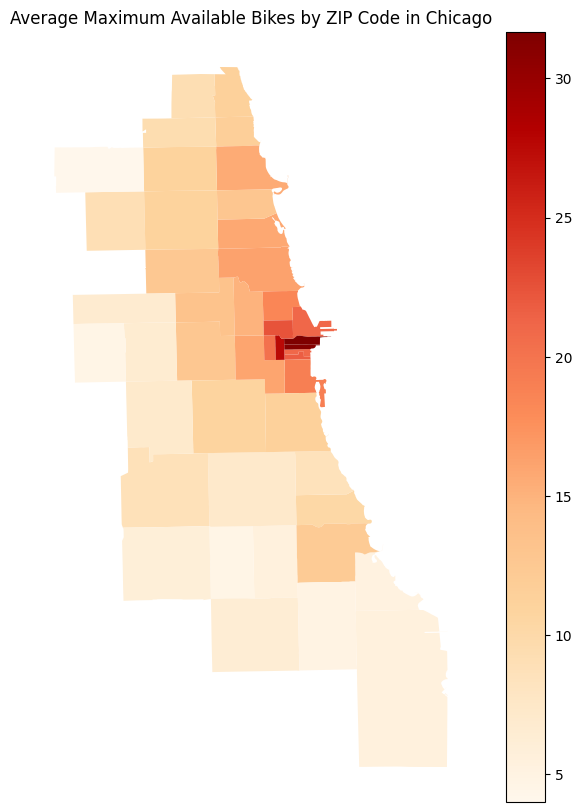

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(column='avg_max_available_bikes', ax=ax, legend=True, cmap='OrRd')
ax.axis('off')
ax.set_title('Average Maximum Available Bikes by ZIP Code in Chicago')
plt.show()

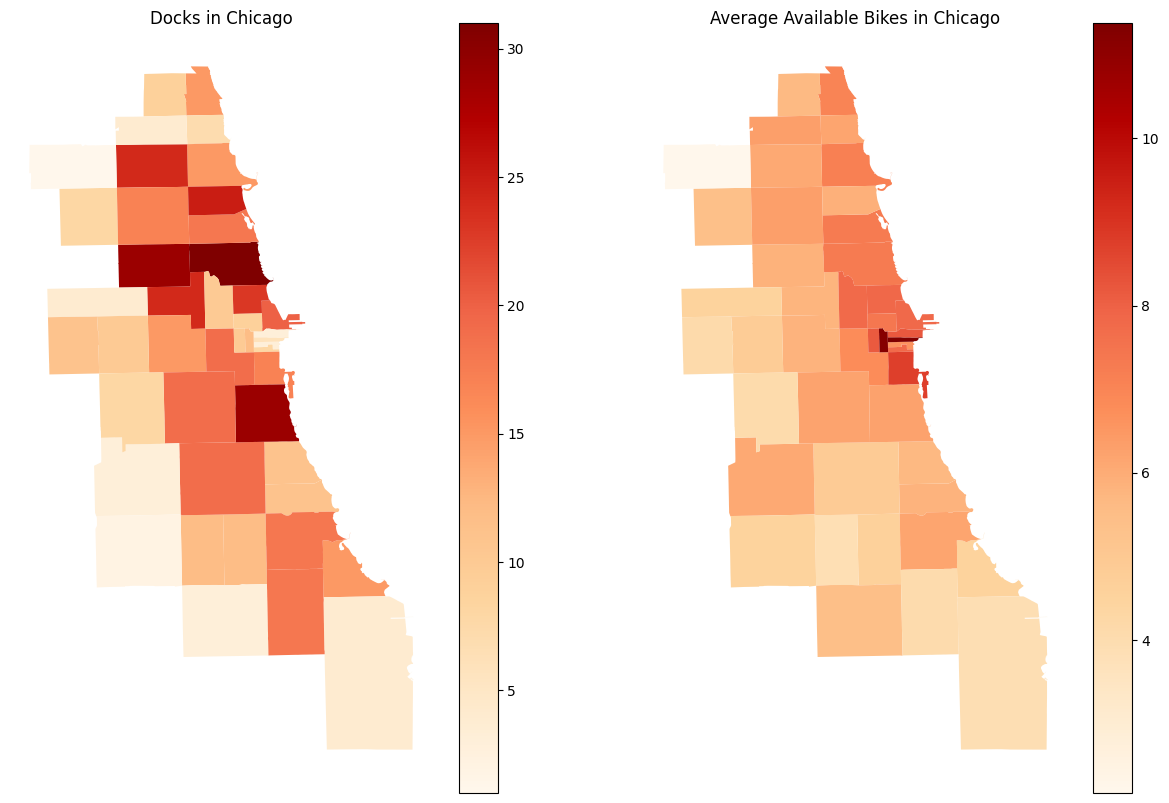

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

merged_gdf.plot(column='station_count', ax=ax1, legend=True, cmap='OrRd')
ax1.axis('off')
ax1.set_title('Docks in Chicago')

merged_gdf.plot(column='avg_available_bikes', ax=ax2, legend=True, cmap='OrRd')
ax2.axis('off')
ax2.set_title('Average Available Bikes in Chicago')

plt.show()

In [2]:
pred_label = [[1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6]]

new_list = [list(group) for group in zip(*pred_label)]

new_list

[[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4], [5, 5, 5], [6, 6, 6]]

In [1]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

#time step, bike cnts, location
# longitude, latitude, 